In [140]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
import matplotlib.colors as colors
from scipy.integrate import odeint
%matplotlib inline

## 1 Warm up 

### 1.1 Fourier series and general concepts

Given the square wave:

$f(t) = 1$ if $|t|<= \frac{T}{4}$

$f(t) = 0$ if $|t|> \frac{T}{4}$

in the range $-\frac{T}{2}$ and $\frac{T}{2}$


(i) Plot $f(t)$ for $-3<=t/T <= 3$

In [2]:
def square_wave(t, T):
    
    ft = np.abs(t)*4 <= T
        
    return ft*1
  

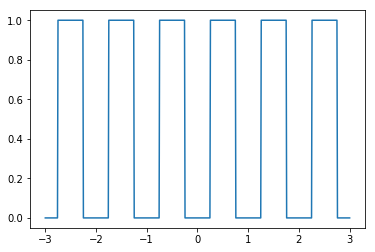

In [3]:
T = 1
t = np.linspace(-T/2,T/2,100)
wave = list(square_wave(t, T))
test = wave*6

t2 = np.linspace(-3,3,len(test)) 

plt.plot(t2, test);

(iii) Show a histogram showing $c_n$ versus n for $-10<n<10$

In [4]:
def cn(n):
    
    if n ==0:
        return 1/2
    
    else:
        return (1/(n*np.pi))*np.sin(n*np.pi/2)
    

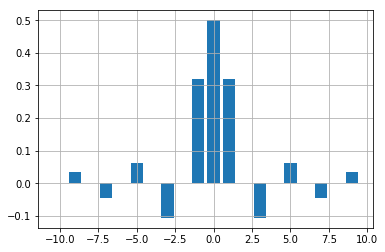

In [5]:
n_values = np.arange(-10,10)

c_values = []

for n in n_values:
    c_values.append(cn(n))
   
plt.bar(n_values, c_values)
plt.grid('on')

(iv) Give the expression for f(t) in terms of n

In [6]:
L = 128
p = 2
X = 20
x = np.arange(-X/2,X/2,X/L)

x[1]-x[0], X/L

(0.15625, 0.15625)

### 1.2 FFT

In [26]:
def showSpectrum(func):
    
    t = np.linspace(0,1, 1024)
    dt = t[1]-t[0]
    f = func(t)
    
    F = np.fft.fft(f, norm='ortho')
    w = np.fft.fftfreq(F.size, dt)
    order = np.argsort(w) 
    w = w[order]
    F = F[order]*dt
    
    f, ax = plt.subplots(1,3, figsize=(15,5))
    ax[0].plot(w, np.abs(F), '-o')
    ax[1].plot(w, np.angle(F), '-o')
    ax[2].plot(w, F.real**2 + F.imag**2)
    plt.tight_layout()

In [8]:
def testfunc(t):
    return 0.5*np.sin(200*2*np.pi*t)+0.2*np.sin(400*2*np.pi*t)

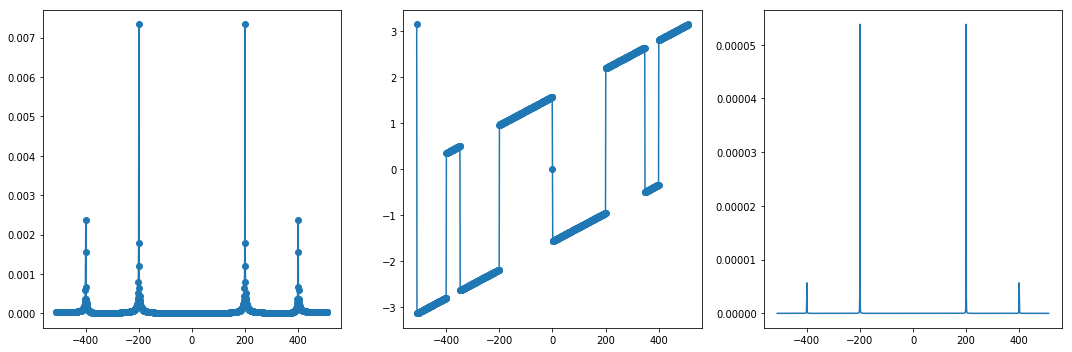

In [9]:
showSpectrum(testfunc)

In [10]:
def function1(t):
    return np.sin(2*np.pi*100*t) + 0.5*np.sin(2*np.pi*200*t)

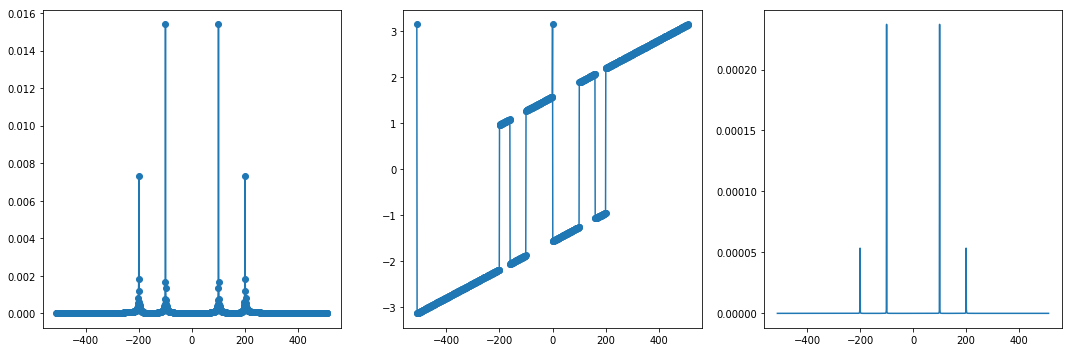

In [11]:
showSpectrum(function1)

In [50]:
def function2(t):
    return np.sin(2*np.pi*100.5*t) + 0.5*np.sin(2*np.pi*200*t)

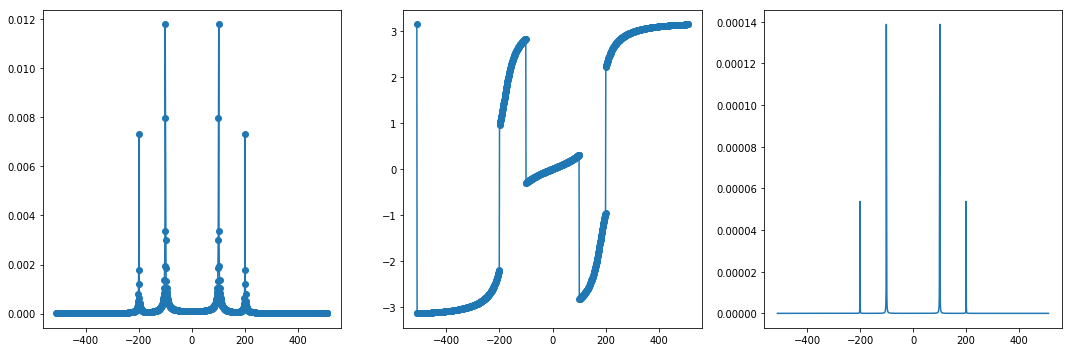

In [51]:
showSpectrum(function2)

In [14]:
def function3(t):
    return (2+np.sin(2*np.pi*8*t))*0.5*np.sin(2*np.pi*200*t)

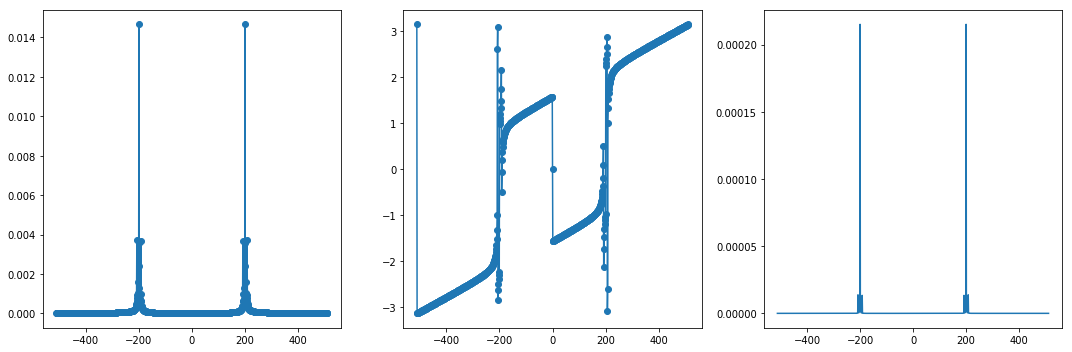

In [15]:
showSpectrum(function3)

In [16]:
def function4(t):
    return np.sin(2*np.pi*100*t*(1+0.1*np.sin(2*np.pi*8*t)))

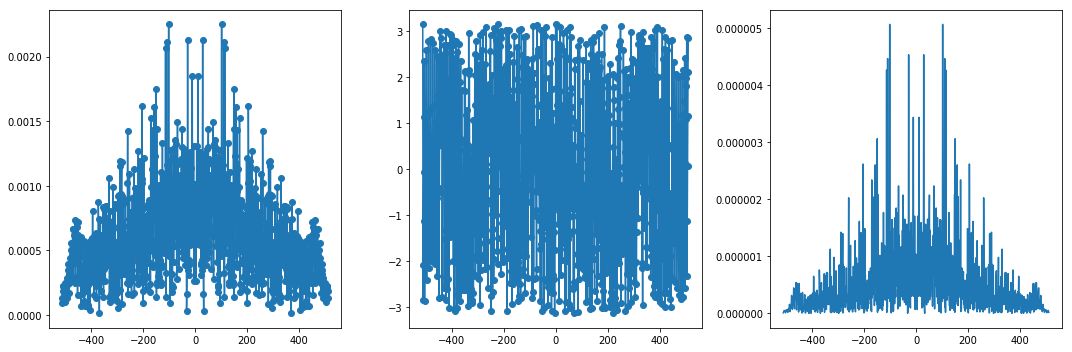

In [17]:
showSpectrum(function4)

# Section 3 Noise and the FFT

## 3.1 White Noise

### 3.1.1 Auto-correlation and Power Spectral Density (PSD) Function


In [9]:
def make_plot(title='', x_label='', y_label='', z_label='', x_lim=(0, 0), y_lim=(0,0), z_lim=(0,0), 
              grid=True, size=(9, 6), dpi=115, font_size=20, label_size=14, three_d=False):
    '''
    Generates a plot object
    
    Parameters:
        title - (string) title of the plot
        x - (float) a list of values for omega/omega_0
        y - (float) a list of values for the amplitude
        xlim - (float) the limit for the x axis, this is a list containing 2 variables, 
                    the max and min value of x
        ylim - (float) the limit for the y axis, this is a list containing 2 variables, 
                    the max and min value of y
        size - (int) resizing the figure of the plot
        dpi - (int) increasing the quality of the image produced
    Returns:
        plot - (object) the plot
    '''
    fig = plt.figure(figsize=(size[0], size[1]), dpi=dpi)
    plot = fig.add_subplot(111) if not three_d else fig.add_subplot(111, projection='3d')
    
    plot.set_title(title)
    if y_lim[0] != 0 and y_lim[1] !=0: plot.set_ylim(y_lim[0], y_lim[1])
    if x_lim[0] != 0 and x_lim[1] !=0: plot.set_xlim(x_lim[0], x_lim[1])
    if z_lim[0] != 0 and z_lim[1] !=0: plot.set_zlim(z_lim[0], z_lim[1])
    plot.set_xlabel(x_label, fontsize=font_size)
    plot.set_ylabel(y_label, fontsize=font_size)
    if three_d: plot.set_zlabel(z_label)
    if grid: plt.grid()
    plot.tick_params(labelsize=label_size);
    
    return plot

In [174]:
def auto_correlation(x):
    '''
    Finds the auto correlation of a digital signal

    '''
    avg = np.average(x)
    sigma2 = np.sum((x - avg)**2)
    return [np.sum((x-avg)*(np.roll(x, k)-avg))/sigma2 for k in range(len(x))]

def PSD(signal=None, AC=None):
    '''
    Power spectral density function (PSD) 
    
    Fourier transform of the auto-correlation function.
    
    '''
    if (AC is None) & (signal is None):
        print("PEBCAK Error: Must input at least one of signal or AC.")
        return []
    elif AC is None:
        AC = auto_correlation(x)
    
    return np.fft.fft(AC)

In [175]:
def uniform_white_noise(mean, interval, npoints=8192):
    '''
    Function to generate uniformly distributed white noise
    '''
    return mean + np.random.uniform(-interval/2, interval/2, npoints)

def gaussian_white_noise(mean, sigma, npoints=8192):
    '''
    Function to generate gaussian white noise
    '''
    return np.random.normal(mean, sigma, npoints)

def delta(k, npoints=8192):
    signal = np.zeros(npoints)
    signal[k] += 1
    return signal

- Plot AC(k) for a white noise signal with finite-length $N=8192$ generated using a uniform distribution RNG
- Plot $S(\omega)$ for the white noise signal

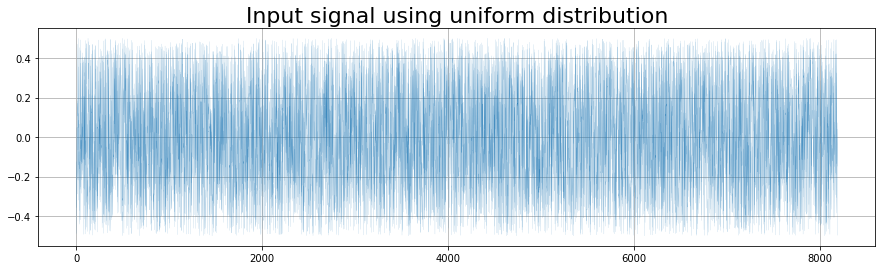

In [176]:
uniform_signal = uniform_white_noise(0, 1)
AC_u = auto_correlation(uniform_signal)
S_u = PSD(AC=AC_u)
S_u_theo = PSD(AC=delta(0))

#****************Plotting****************
font_size=22

plt.figure(figsize=(15,4))
plt.title('Input signal using uniform distribution', fontsize = 22)
plt.plot(uniform_signal, linewidth=0.1)
plt.grid('on')

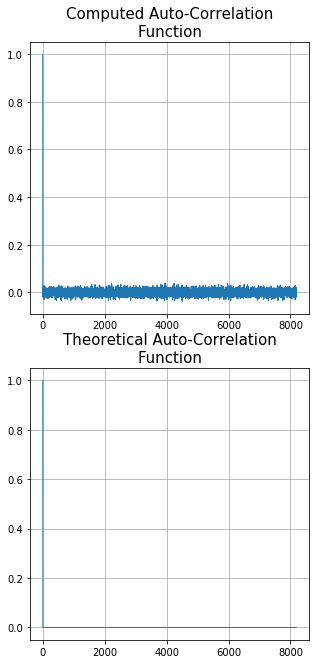

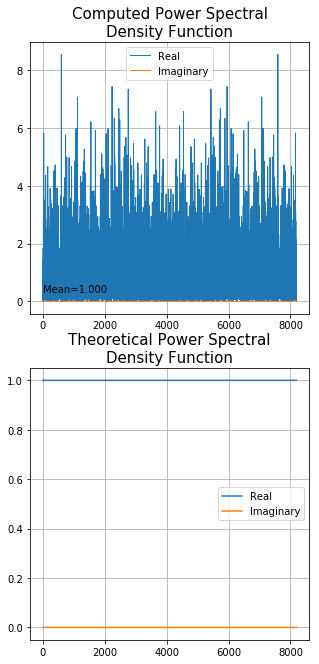

In [185]:
#****************Plotting****************
font_size=15

# Auto-correlation function
f,ax = plt.subplots(2, 1, figsize=(5,11))
ax[0].plot(AC_u, linewidth=1)
ax[0].set_title('Computed Auto-Correlation\nFunction', fontsize=font_size)
ax[0].grid('on')
ax[1].plot(delta(0), linewidth=1)
ax[1].set_title('Theoretical Auto-Correlation\nFunction', fontsize=font_size)
ax[1].grid('on')

# PSD
f,ax = plt.subplots(2, 1, figsize=(5,11))
ax[0].plot(S_u.real, label="Real", linewidth=1)
ax[0].plot(S_u.imag, label="Imaginary", linewidth=1)
ax[0].set_title('Computed Power Spectral\nDensity Function', fontsize=font_size)
ax[0].text(0, 0.3, 'Mean=%.3f' %  np.mean(S_u.real))
ax[0].grid('on')
ax[0].legend()
ax[1].plot(S_u_theo.real, label="Real")
ax[1].plot(S_u_theo.imag, label="Imaginary")
ax[1].set_title('Theoretical Power Spectral\nDensity Function', fontsize=font_size)
ax[1].grid('on')
ax[1].legend();

- Redo the above using a Gaussian probability distribution function and plot its $S(\omega)$

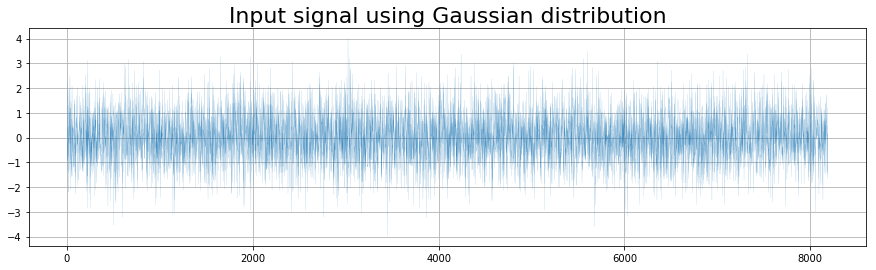

In [179]:
gaussian_signal = gaussian_white_noise(0, 1)
AC_g = auto_correlation(gaussian_signal)
S_g = PSD(AC=AC_u)
S_g_theo = PSD(AC=delta(0))

#****************Plotting****************
font_size=22

plt.figure(figsize=(15,4))
plt.title('Input signal using Gaussian distribution', fontsize = 22)
plt.plot(gaussian_signal, linewidth=0.1)
plt.grid('on')

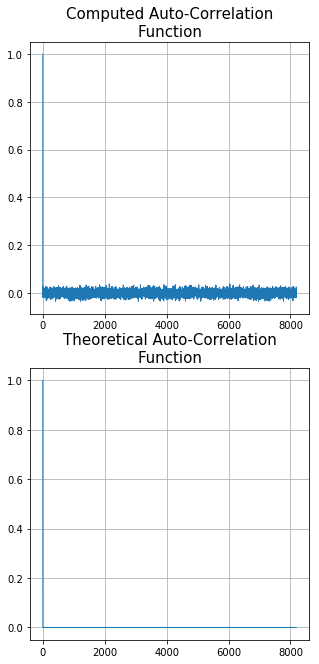

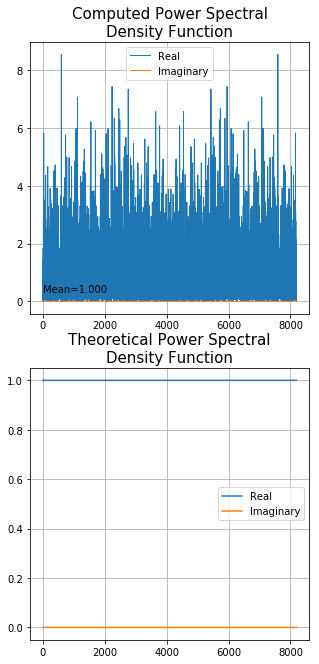

In [186]:

#****************Plotting****************
font_size=15

#make_plot('Input Signal').plot(gaussian_signal)

# Auto-correlation function
f,ax = plt.subplots(2, 1, figsize=(5,11))
ax[0].plot(AC_g, linewidth=1)
ax[0].set_title('Computed Auto-Correlation\nFunction', fontsize=font_size)
ax[0].grid('on')
ax[1].plot(delta(0), linewidth=1)
ax[1].set_title('Theoretical Auto-Correlation\nFunction', fontsize=font_size)
ax[1].grid('on')

# PSD
f,ax = plt.subplots(2, 1, figsize=(5,11))
ax[0].plot(S_g.real, label="Real", linewidth=1)
ax[0].plot(S_g.imag, label="Imaginary", linewidth=1)
ax[0].set_title('Computed Power Spectral\nDensity Function', fontsize=font_size)
ax[0].text(0, 0.3, 'Mean=%.3f' %  np.mean(S_u.real))
ax[0].grid('on')
ax[0].legend()
ax[1].plot(S_g_theo.real, label="Real")
ax[1].plot(S_g_theo.imag, label="Imaginary")
ax[1].set_title('Theoretical Power Spectral\nDensity Function', fontsize=font_size)
ax[1].grid('on')
ax[1].legend();

## 3.2 Noise Reduction: The spectral subtraction method

In [25]:
def get_fft_add_noise(signal_func, dt, Nintervals, RandSize=0, reorder = False):
    
    t = np.arange(Nintervals)*dt
    x = signal_func(t)
    
    if RandSize:
        r = (np.random.rand(Nintervals)-0.5)*RandSize/0.5
        x = x + r
        
    X = np.fft.fft(x, norm='ortho')
    freq = np.fft.fftfreq(len(t))
    
    if reorder:
        order = np.argsort(freq)
        freq=freq[order]
        X = X[order]
    
    return t, x, freq, X

In [26]:
def plot_signal_amplitude_power(t, x, f, X, ax1, ax2, ax3, signal_title=''):
    
    ax1.plot(t, x)
    ax1.set_title('Signal '+signal_title, fontsize=15)
    ax1.set_xlabel('time t', fontsize=15)
    ax1.set_ylabel('signal $x(t)$', fontsize=15)
    ax1.grid('on')
    
    ax2.plot(f, np.abs(X))
    ax2.set_title('Amplitude spectrum', fontsize=15)
    ax2.set_xlabel('frequency', fontsize=15)
    ax2.set_ylabel('Amplitude $|X(f)|$', fontsize=15)
    ax2.grid('on')
    
    ax3.plot(f, np.abs(X)**2)
    ax3.set_title('Power spectrum', fontsize=15)
    ax3.set_xlabel('frequency', fontsize=15)
    ax3.set_ylabel('Amplitude $|X(f)|^2$', fontsize=15)
    ax3.grid('on')
    
    plt.tight_layout()

Let's take again a simple signal $x(t)=\sin(2\pi f_0 t) + 0.5\sin(2\pi [2f_0] t)$ with frequency $f_0=440$ Hz and sample it with $\Delta t = 22.2\mu s$. We will take $N=512$ intervals so that $t=i\Delta t$ with $i=0,511$.

In [27]:
def sample_signal(t):
    
    f0 = 440
    pi = np.pi
    
    first = np.sin(2*pi*f0*t)
    second = 0.5*np.sin(2*pi*(2*f0)*t)
    
    return first + second

- Plot the digitized signal for $i=0,511$. You should see the signal over many periods
- Run a FFT on it and plot its power spectrum. At what values of $i$ do you get dominant freqencies and why?

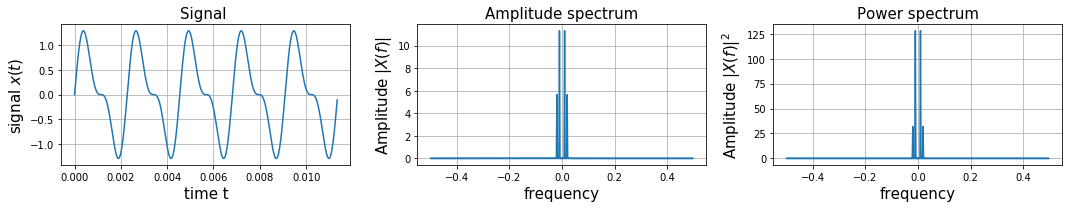

In [28]:
t0, x0, freq0, X0 = get_fft_add_noise(sample_signal, 22.2e-6, 512);
   
fig, ax = plt.subplots(1,3, figsize=(15,3))
plot_signal_amplitude_power(t0, x0, freq0, X0, ax[0], ax[1], ax[2])

Let's make the signal noisy by adding a random number $r_i$ between -0.5 and +0.5 to each $x_i$ so that $y_i=x_i + r_i$. Plot the noisy signal for $i=0,511$. Run an FFT on it and plot its power spectrum.

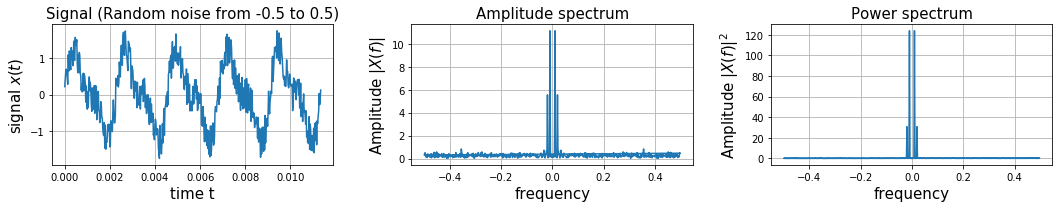

In [29]:
t, x, freq, X = get_fft_add_noise(sample_signal, 22.2e-6, 512, RandSize=0.5);
   
fig, ax = plt.subplots(1,3, figsize=(15,3))
plot_signal_amplitude_power(t, x, freq, X, ax[0], ax[1], ax[2], signal_title='(Random noise from -0.5 to 0.5)')

Do you see the manifestation of the noise in the plots above? It is white noise? How big should the random number $r_i$ be to completly scramble the signal?

In [30]:
def remove_noise(X, threshold):
    
    amplitude = np.abs(X)
    
    remove = amplitude.max()*threshold
        
    X[np.where(amplitude<remove)] =0
    
    return X

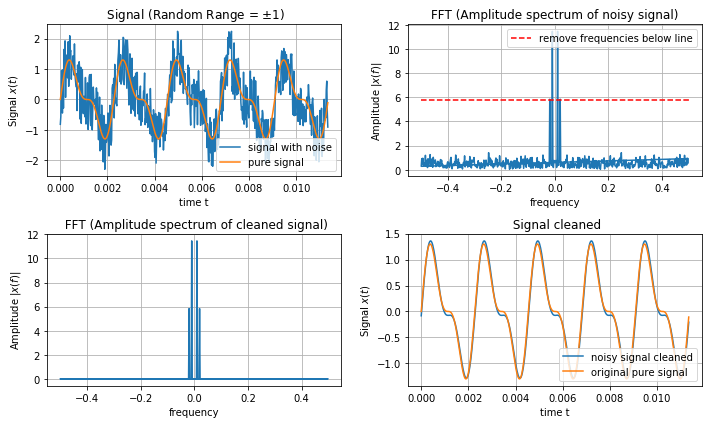

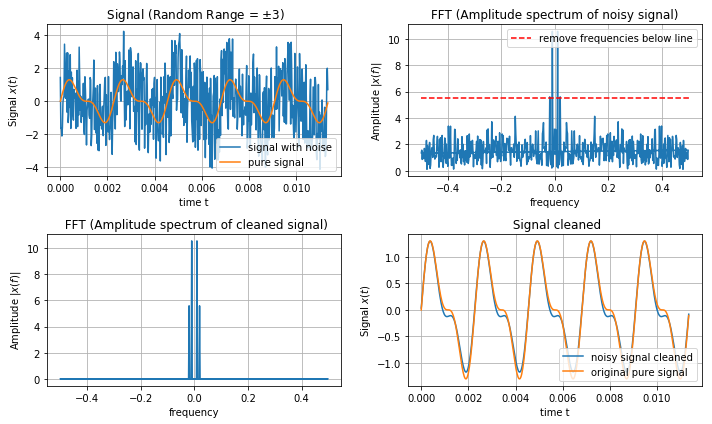

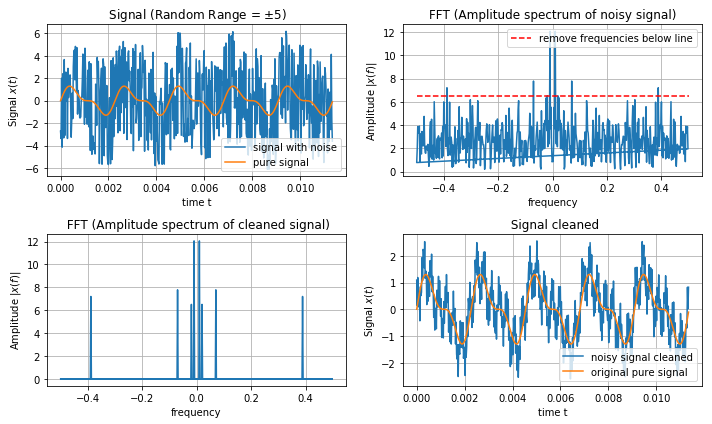

In [31]:
RS = (1,3,5)

for n in RS:
    
    t, x, freq, X = get_fft_add_noise(sample_signal, 22.2e-6, 512, RandSize=n);
    fig, ax = plt.subplots(2,2, figsize=(10,6))

    ax[0][0].plot(t, x, label = 'signal with noise')
    ax[0][0].set_title(' Signal (Random Range = $\pm$'+str(n) +')')
    ax[0][0].set_xlabel('time t')
    ax[0][0].set_ylabel('Signal $x(t)$')
    ax[0][0].plot(t, x0, label ='pure signal')
    ax[0][0].legend(loc=4)
    ax[0][0].grid('on')
    Xmag = np.abs(X)

    line = (Xmag[10]-0.05)
    ax[0][1].plot(freq, Xmag)
    ax[0][1].set_title('FFT (Amplitude spectrum of noisy signal)')
    ax[0][1].plot(np.linspace(-0.5,0.5,10), np.ones(10)*line, 'r--', label ='remove frequencies below line')
    ax[0][1].set_xlabel('frequency')
    ax[0][1].set_ylabel('Amplitude $|x(f)|$')
    ax[0][1].legend(loc=1)
    ax[0][1].grid('on')
    
    threshold = line/Xmag.max()


    X = remove_noise(X, threshold)
    Xmag = np.abs(X)
    ax[1][0].set_title(' FFT (Amplitude spectrum of cleaned signal)')
    ax[1][0].plot(freq, Xmag)
    ax[1][0].set_xlabel('frequency')
    ax[1][0].set_ylabel('Amplitude $|x(f)|$')
    ax[1][0].grid('on')

    x = np.fft.ifft(X, norm='ortho').real
    ax[1][1].plot(t, x, label='noisy signal cleaned')
    ax[1][1].plot(t, x0, label='original pure signal')
    ax[1][1].set_title(' Signal cleaned')
    ax[1][1].set_xlabel('time t')
    ax[1][1].set_ylabel('Signal $x(t)$')
    ax[1][1].legend(loc=4)
    ax[1][1].grid('on')
    plt.tight_layout()
    plt.show()
    


## 3.2 Noise in signals with trends

Let's take again a signal similar to the previous one over N=512 bins (i=0,512) but with a trend function g(i) = 1 + 0.025i.

In [32]:
def signal_with_trend_function(i):
    trend = True
    
    f0 = 9/512
    f1 = 4/512
    
    if trend:
        gi = 1 + 0.025*i
    else: gi =0
    
    xi = 2*np.sin(np.pi*f0*i) + np.cos(np.pi*f1*i) +gi
    
    return xi

Plot the signal

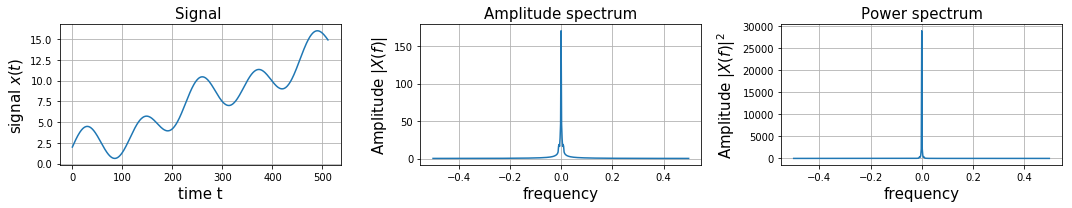

In [33]:
t, x0, freq, X = get_fft_add_noise(signal_with_trend_function, 1, 512, reorder=True);
   
fig, ax = plt.subplots(1,3, figsize=(15,3))
plot_signal_amplitude_power(t, x0, freq, X, ax[0], ax[1], ax[2])


Let's make the signal noisy by adding a random number $r_i$ between -6 and +6 to each $x_i$ so that $y_i=x_i + r_i$. Plot the noisy signal and comment on its shape. Is the orignal signal visible?

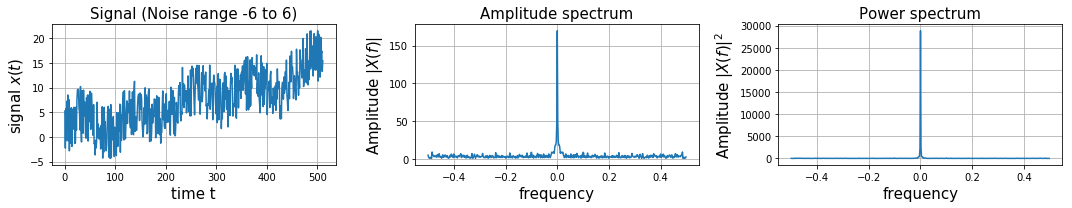

In [34]:
t, x, freq, X = get_fft_add_noise(signal_with_trend_function, 1, 512, RandSize=6, reorder=True);
   
fig, ax = plt.subplots(1,3, figsize=(15,3))
plot_signal_amplitude_power(t, x, freq, X, ax[0], ax[1], ax[2], signal_title='(Noise range -6 to 6)')

Zero out all frequencies between frequency magnitude 18 and do an IDFT. Do you recover the orignal signal?

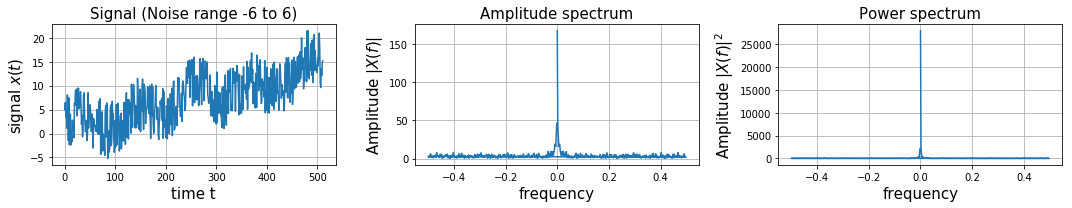

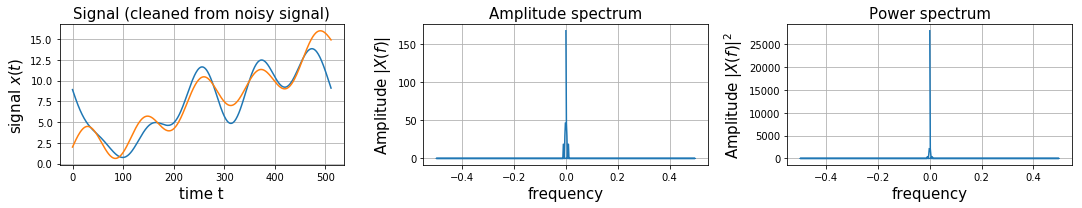

In [35]:
t, x, freq, X = get_fft_add_noise(signal_with_trend_function,  1, 512, RandSize=6);
   
fig, ax = plt.subplots(1,3, figsize=(15,3))
plot_signal_amplitude_power(t, x, freq, X, ax[0], ax[1], ax[2], signal_title='(Noise range -6 to 6)')
plt.show()

filter_threshold = 18/np.abs(X).max()

X = remove_noise(X, filter_threshold)
x = np.fft.ifft(X, norm='ortho')

fig, ax = plt.subplots(1,3, figsize=(15,3))
plot_signal_amplitude_power(t, x.real, freq, X, ax[0], ax[1], ax[2], signal_title='(cleaned from noisy signal)')
ax[0].plot(t,x0)
plt.show()

Now remove the trend from the noisy signal and redo the analysis above. Is the noise easily dicernable and can you see the main components of the noiseless signal?

In [36]:
# get trend
t, x, freq, X = get_fft_add_noise(signal_with_trend_function,  1, 512, RandSize=6);


gcoefs = np.polyfit(t, x, 1)
g = np.polyval(gcoefs, t)

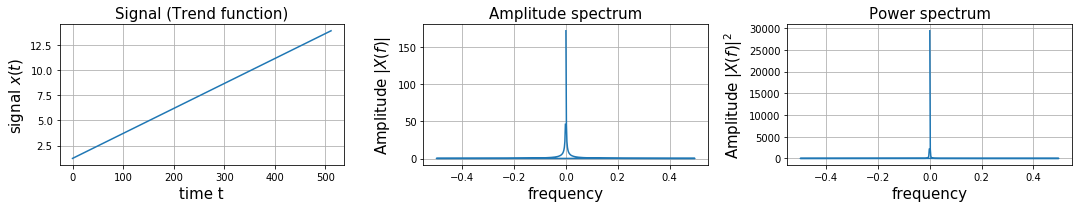

In [37]:
Xg = np.fft.fft(g, norm='ortho')
Xgmag = np.abs(Xg)

fig, ax = plt.subplots(1,3, figsize=(15,3))
#ax[0].plot(t, x)
#ax[0].plot(t, g)
#ax[1].plot(freq, Xgmag)
#ax[2].plot(freq, Xgmag**2)
#plt.tight_layout()

#ax[0].plot(t, x);
plot_signal_amplitude_power(t, g, freq, Xg, ax[0], ax[1], ax[2], signal_title='(Trend function)')


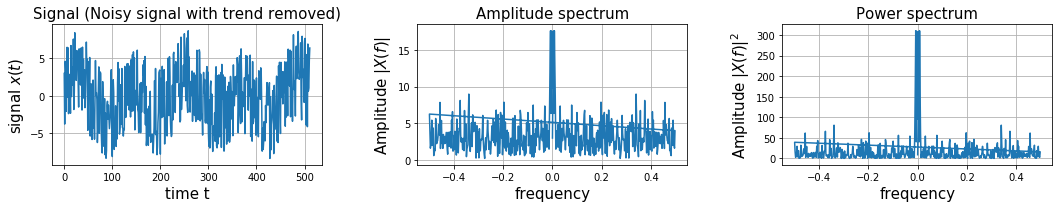

In [38]:
t, x, freq, X = get_fft_add_noise(signal_with_trend_function,  1, 512, RandSize=6);
   
X = X-Xg
x_trend_removed=(np.fft.ifft(X, norm='ortho')).real

fig, ax = plt.subplots(1,3, figsize=(15,3))
plot_signal_amplitude_power(t, x_trend_removed, freq, X, ax[0], ax[1], ax[2], signal_title='(Noisy signal with trend removed)')


#ax[0].plot(t, (np.fft.ifft(X, norm='ortho')).real)
#ax[1].plot(freq, np.abs(X))
#ax[2].plot(freq, np.abs(X)**2)
#plt.tight_layout()
#plt.show()

Zero out all frequencies below the frequency magnitude of 9 and do an IDFT. Then add the trend. Do you recover the original signal?

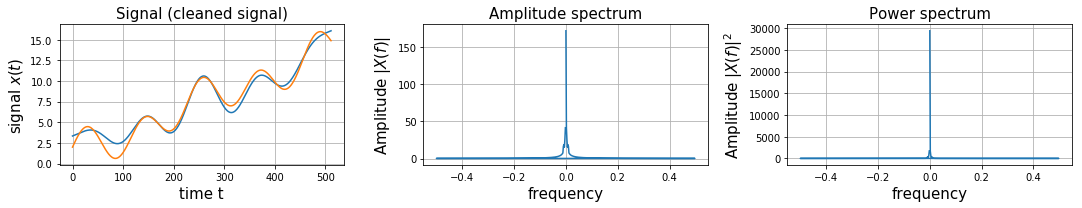

In [39]:
t, x, freq, X = get_fft_add_noise(signal_with_trend_function,  1, 512, RandSize=6);
   
X = X-Xg

filter_threshold = 9/np.abs(X).max()
X = remove_noise(X, filter_threshold)

X = X+Xg

x = np.fft.ifft(X, norm='ortho').real

fig, ax = plt.subplots(1,3, figsize=(15,3))
plot_signal_amplitude_power(t, x, freq, X, ax[0], ax[1], ax[2], signal_title='(cleaned signal)')


#ax[0].plot(t, (np.fft.ifft(X, norm='ortho')).real)
ax[0].plot(t, x0)
#ax[1].plot(freq, np.abs(X))
#ax[2].plot(freq, np.abs(X)**2)
#plt.tight_layout()
#plt.show()


# 4.1 

In [2]:
def rk4(x_prime, y_prime, z_prime):
    '''
    Implements a fourth order Runge-Kutta method of integration
    for three equations, *all without a time dependence*. This algorithm
    will not work if the equations have a time dependence (though can
    be modified to with little effort).
    
    References:
    - https://rosettacode.org/wiki/Runge-Kutta_method#using_lambda
    - https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods 
    - https://math.stackexchange.com/questions/721076/help-with-using-the-runge-kutta-4th-order-method-on-a-system-of-2-first-order-od
    - https://www.codeproject.com/Tips/792927/Fourth-Order-Runge-Kutta-Method-in-Python
    - https://www.youtube.com/watch?v=EXvLju3DLMY
    
    Params:
    
    '''
    return lambda x, y, z, h: (
            lambda k0, l0, j0: (
                lambda k1, l1, j1: (
                    lambda k2, l2, j2: (
                        lambda k3, l3, j3: (x + h*(k0 + 2*(k1 + k2) + k3)/6, 
                                            y + h*(l0 + 2*(l1 + l2) + l3)/6,
                                            z + h*(j0 + 2*(j1 + j2) + j3)/6)
                        )(x_prime(x+h*k2, y+h*l2, z+h*j2),
                          y_prime(x+h*k2, y+h*l2, z+h*j2),
                          z_prime(x+h*k2, y+h*l2, z+h*j2))
                    )(x_prime(x+h*k1/2, y+h*l1/2, z+h*j1/2),
                      y_prime(x+h*k1/2, y+h*l1/2, z+h*j1/2),
                      z_prime(x+h*k1/2, y+h*l1/2, z+h*j1/2))
                )(x_prime(x+h*k0/2, y+h*l0/2, z+h*j0/2),
                  y_prime(x+h*k0/2, y+h*l0/2, z+h*j0/2),
                  z_prime(x+h*k0/2, y+h*l0/2, z+h*j0/2))
            )(x_prime(x, y, z),
              y_prime(x, y, z),
              z_prime(x, y, z))

def funtion_derivatives(r, sigma=10, b=8/3):
    return (lambda x, y, z: sigma*(y - x),
            lambda x, y, z: r*x - y - x*z,
            lambda x, y, z: x*y - b*z    )

def lorenz_positions(x_0, y_0, z_0, r=28, max_time=40, dt=0.001, verbose=False):
    '''
    Function ot calculate the positions of a particle in a Lorenz
    system from time 0 to max_time using a specified time step. 
    Can also plot the particle's path throughout this time.
    '''
    x, y, z = [x_0], [y_0], [z_0]
    lorenz_system = rk4(*funtion_derivatives(r))

    for time in np.arange(0, max_time, dt):
        x_temp, y_temp, z_temp = lorenz_system(x[-1], y[-1], z[-1], dt)

        x.append(x_temp)
        y.append(y_temp)
        z.append(z_temp)
        
    if verbose:
        fig = plt.figure(figsize=(12,8))
        ax = fig.gca(projection='3d')
        ax.plot(np.array(x), np.array(y), np.array(z), linewidth=0.5)
        
        ax.set_title('Lorenz System\nStarting Condition: (' + str(x_0) + ", " + str(y_0) + ", " + str(z_0) + ")")
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
    
    return np.array([np.array(x), np.array(y), np.array(z)])

def lorenz_multipanel(plots, size, delta_r=False, label_size=12, font_size=14):
    '''
    Takes a specially formatted plot array (associated with the values of shape)
    and plots different Lorenz graphs in different panels with the proper labels.
    '''
    fig, ax = plt.subplots(*size, figsize=(6*size[1],6*size[0]), subplot_kw={'projection': '3d'})
    fig.tight_layout()
    
    for a1, p1 in zip(ax, plots):
        for a2, p2 in zip(a1, p1):
            a2.plot(*p2[1], linewidth=0.5)

            if not delta_r:
                a2.set_title('Starting Position: (' + 
                        str(p2[0][0]) + ", " + str(p2[0][1]) + ", " + 
                        str(p2[0][2]) + ")", fontsize=font_size)
            else:
                a2.set_title('$r = ' + str(p2[0]) + '$')
            a2.set_xlabel('$x$', fontsize=font_size, color='blue')
            a2.set_ylabel('$y$', fontsize=font_size, color='blue')
            a2.set_zlabel('$z$', fontsize=font_size, color='blue')
            a2.tick_params(labelsize=label_size)
        
    return

In [41]:
# This is just a very detailed Lorenz graph. Takes somewhere on the order of a minute to run
IWantToWaitAWhile = False
if IWantToWaitAWhile: lorenz_positions(5, 5, 5, r=24.8, max_time=10**4, dt=0.01, verbose=True);

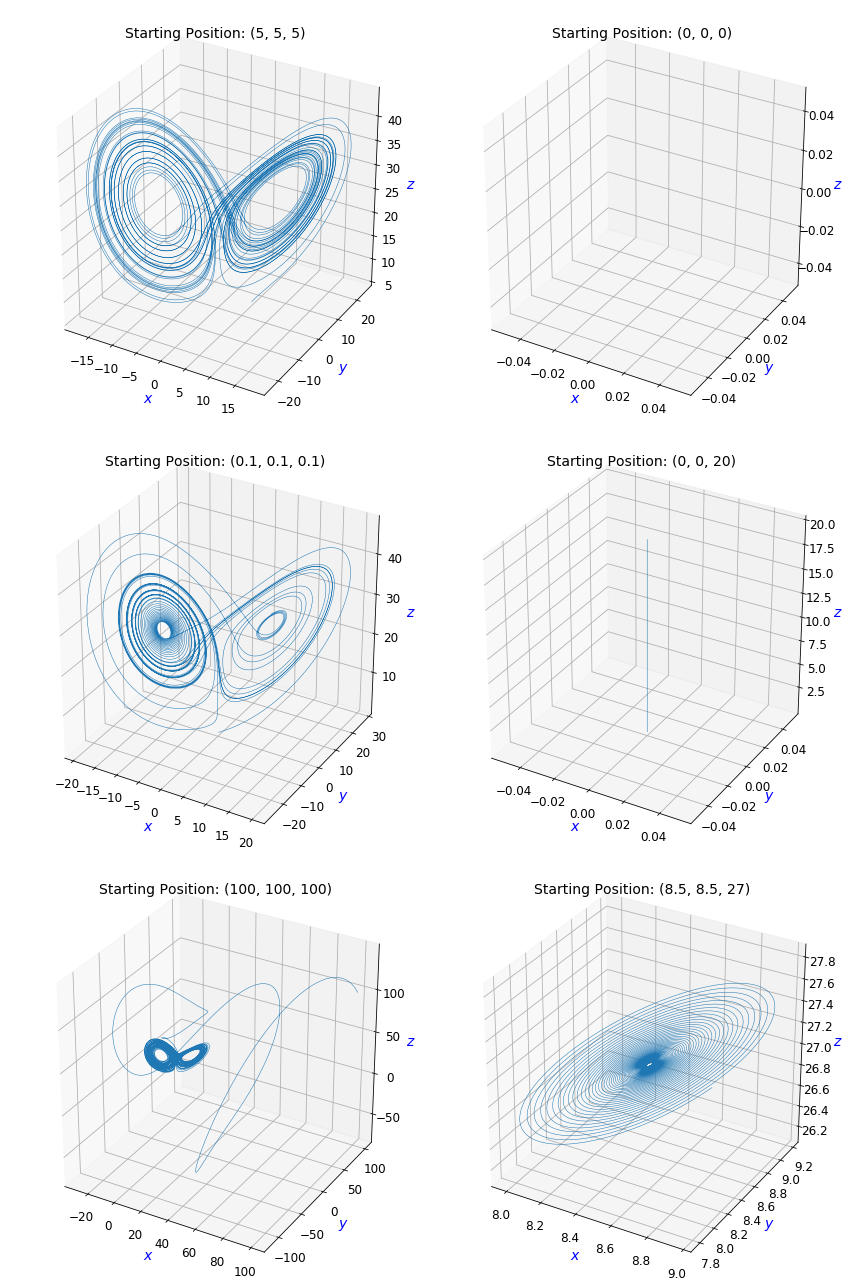

In [42]:
%matplotlib inline
plots = [(((5, 5, 5), lorenz_positions(5, 5, 5)), 
          ((0, 0, 0), lorenz_positions(0, 0, 0))), 
         (((0.1, 0.1, 0.1), lorenz_positions(0.1, 0.1, 0.1)), 
          ((0, 0, 20), lorenz_positions(0, 0, 20))), 
         (((100, 100, 100), lorenz_positions(100, 100, 100)), 
          ((8.5, 8.5, 27), lorenz_positions(8.5, 8.5, 27)))]
lorenz_multipanel(plots, (3,2))

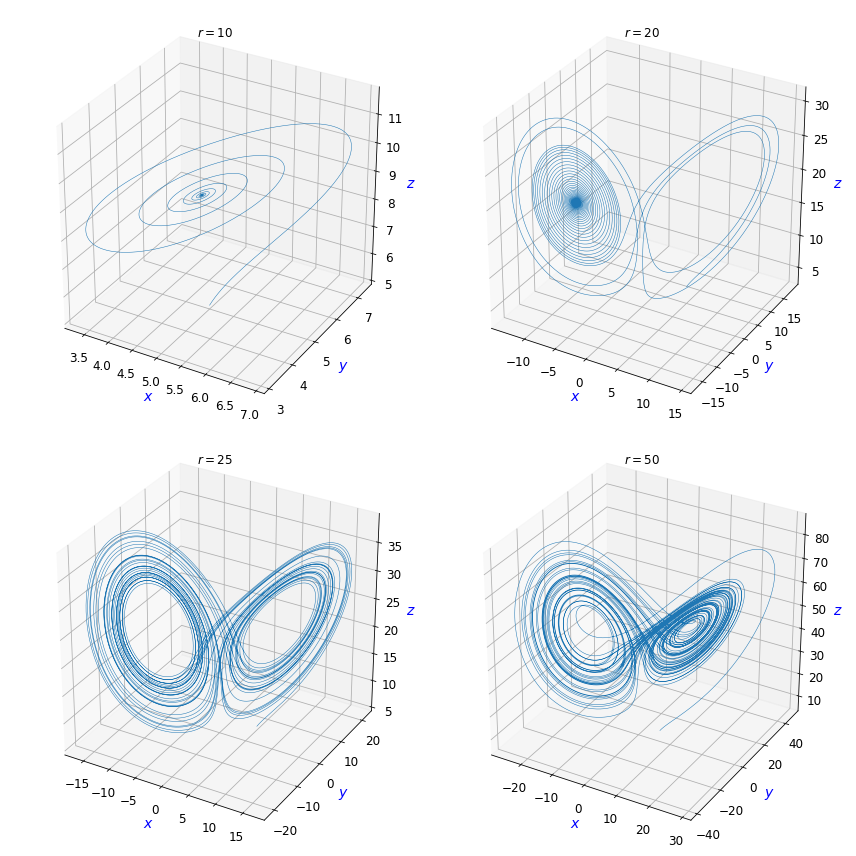

In [43]:
plots = [((10, lorenz_positions(5, 5, 5, r=10)), 
          (20, lorenz_positions(5, 5, 5, r=20))), 
         ((25, lorenz_positions(5, 5, 5, r=25)), 
          (50, lorenz_positions(5, 5, 5, r=50)))]
lorenz_multipanel(plots, (2, 2), delta_r=True)

In [44]:
%timeit lorenz_positions(5, 5, 5)

259 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Mean error per point: 4.25301545728005


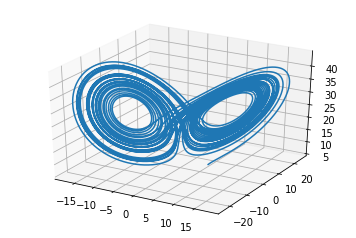

In [45]:
'''
THEORETICAL FROM WIKIPEDIA. DO NOT USE FOR ANALYSIS, EXCEPT FOR COMPARISON.
https://en.wikipedia.org/wiki/Lorenz_system#Python_simulation

In general, odeint seems to be more accurate with less accumulated error.
'''
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # derivatives

dt = 0.001
max_time = 40
state0 = [5, 5, 5]
t = np.arange(0.0, max_time, dt)

states = odeint(f, state0, t)
x, y, z = lorenz_positions(5, 5, 5)

print("Mean error per point:", np.sum(abs(states[:, 0] - x[:-1]))*dt/max_time )

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(states[:,0], states[:,1], states[:,2])
plt.show()

<IPython.core.display.Javascript object>


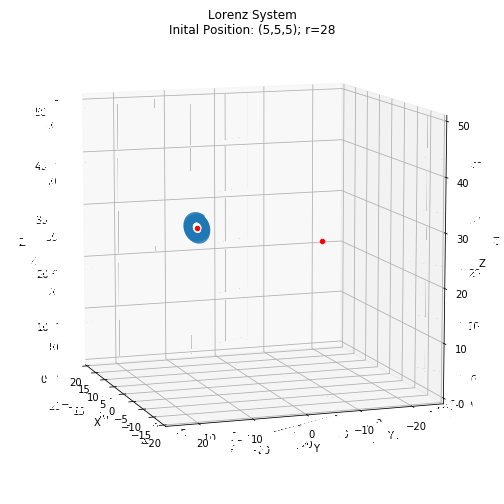

In [139]:
%matplotlib notebook
%matplotlib notebook

def update_lines(num, dataLines, lines):
    '''
    Function which updates the lines for an animation. Does not 
    generate or append stuff, just takes progressively larger
    chunks of a pregenerated list of nodes for an arbitrary number 
    of lines.
    '''
    #Source: https://matplotlib.org/examples/animation/simple_3danim.html
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    plt.gca().view_init(elev=10., azim=num/2)
    return lines

def generate_plot_object(data):
    '''
    A function to generate the lines for a plot to be animated, initialised with the first
    nodes in the data array.
    '''
    #Source: https://matplotlib.org/examples/animation/simple_3danim.html
    fig = plt.figure()
    ax = p3.Axes3D(fig)
    fig.set_size_inches(7, 7)

    # NOTE: Can't pass empty arrays into 3d version of plot()
    lines = [ax.plot(dat[0, :1], dat[1, :1], dat[2, :1], linewidth=0.8)[0] for dat in data]

    # Setting the axes properties
    ax.set_xlim3d([-20, 20])
    ax.set_xlabel('X')

    ax.set_ylim3d([-25, 25])
    ax.set_ylabel('Y')

    ax.set_zlim3d([0.0, 50.0])
    ax.set_zlabel('Z')

    ax.set_title('Lorenz System\nInital Position: (5,5,5); r=28')
    ax.scatter(*fixed_point(28), color='r')
    ax.scatter(*fixed_point(28, multiplyer=-1, b=8/3), color='r')
    
    return fig, lines

def fixed_point(r, multiplyer=1, b=8/3):
    x = multiplyer*np.sqrt(b*(r-1))
    y = x
    z = r-1
    return x, y, z

max_time = 40
nframes = 4000
data = np.array([lorenz_positions(7.8, 7.8, 27, max_time=max_time, dt=max_time/nframes)])

fig, lines = generate_plot_object(data)

line_ani = animation.FuncAnimation(fig, update_lines, nframes, fargs=(data, lines),
                                   interval=10, blit=True);

# For a mac (sorta, need to be modified a little bit):
# Uncomment these lines to save the animation. 
# Please make sure that you download ffmpeg and then set the pointer to the correct location for your system
#plt.rcParams['animation.ffmpeg_path'] = '/home/nathan.meulenbroek/miniconda3/bin'
#line_ani.save('lorentz_system.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

# For windows machine:
saving = False
if saving:
    plt.rcParams['animation.ffmpeg_path'] = 'D:\\Downloads\\ffmpeg-20180227-fa0c9d6-win64-static\\ffmpeg-20180227-fa0c9d6-win64-static\\bin\\ffmpeg.exe'
    FFwriter = animation.FFMpegWriter(fps=60)
    print("Saving")
    line_ani.save('lorentz_system_rotating.mp4', writer=FFwriter, dpi=100)
    print("Saved")

In [136]:
%matplotlib inline
r = np.linspace(0, 30, 1001, dtype=np.complex)

endpoint = []

for i in r:
    endpoint.append(lorenz_positions(*np.random.uniform(-5, 5, 3), r=i.real, max_time=300, dt=0.1)[0, -1])
    if i.real%3<1e-5: print("r =", i.real, "done")

y = fixed_point(r)[0]

r = 0.0 done
r = 3.0 done
r = 6.0 done
r = 9.0 done
r = 12.0 done
r = 15.0 done
r = 18.0 done
r = 21.0 done
r = 24.0 done
r = 27.0 done
r = 30.0 done


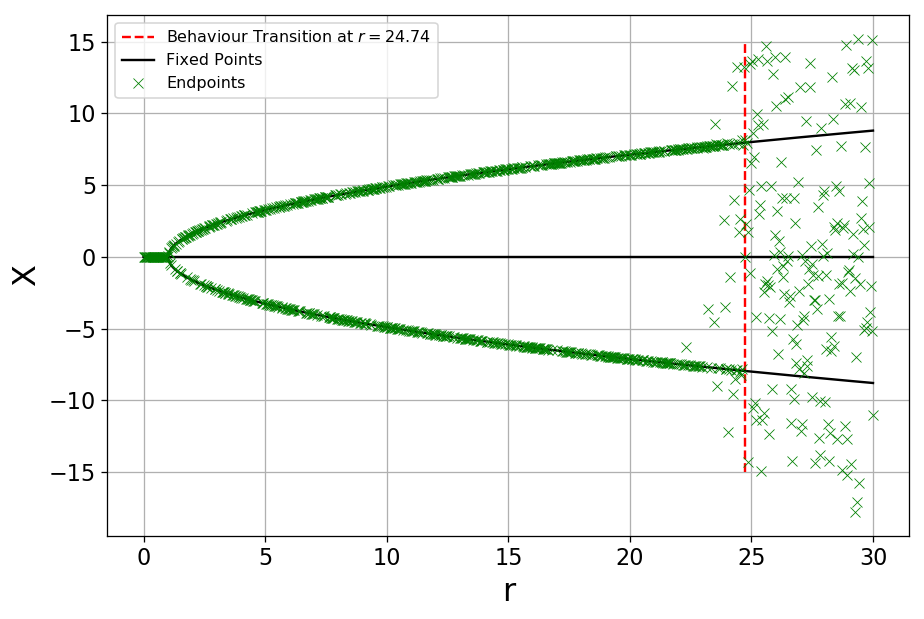

In [135]:
plot = make_plot(x_label='r', y_label='X')
plot.plot(np.ones(5)*24.74, np.linspace(-15, 15, 5), 'r--', label="Behaviour Transition at $r=24.74$")
plot.plot(r.real, y.real, 'k-')
plot.plot(r.real, -y.real, 'k-', label="Fixed Points")
plot.plot(r.real, np.zeros(r.size), 'k-')
plot.plot(r.real, endpoint, 'gx', label='Endpoints', markeredgewidth=0.5)
plot.legend();

## 4.1.1

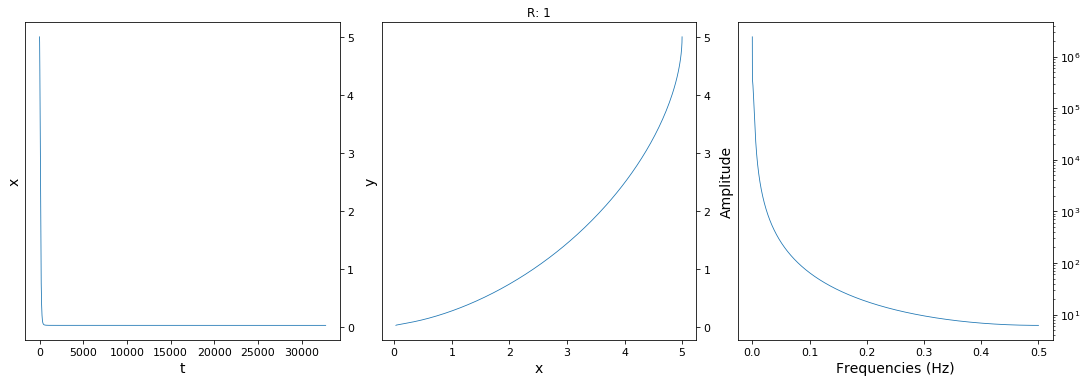

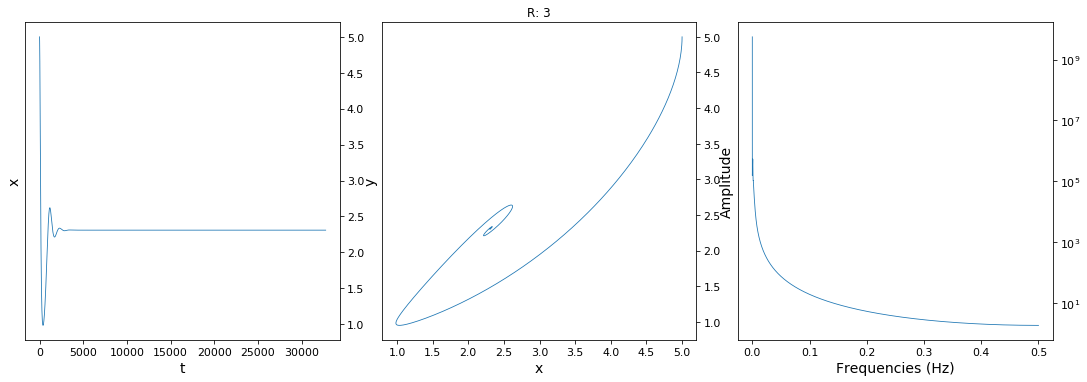

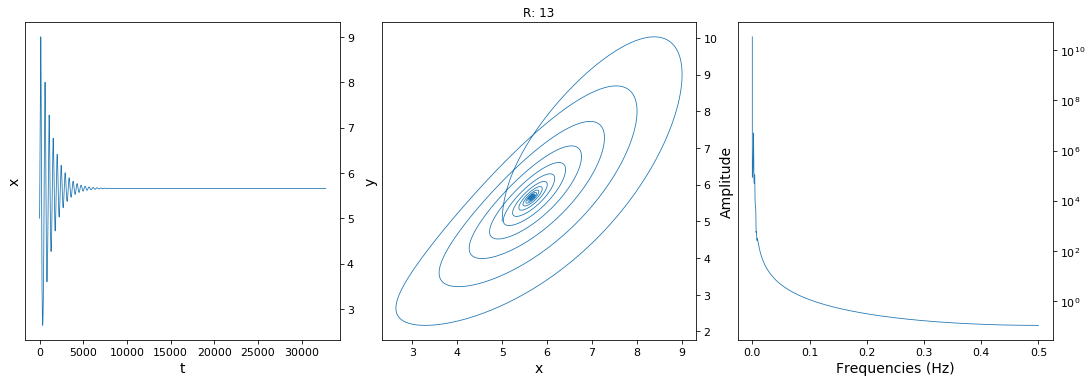

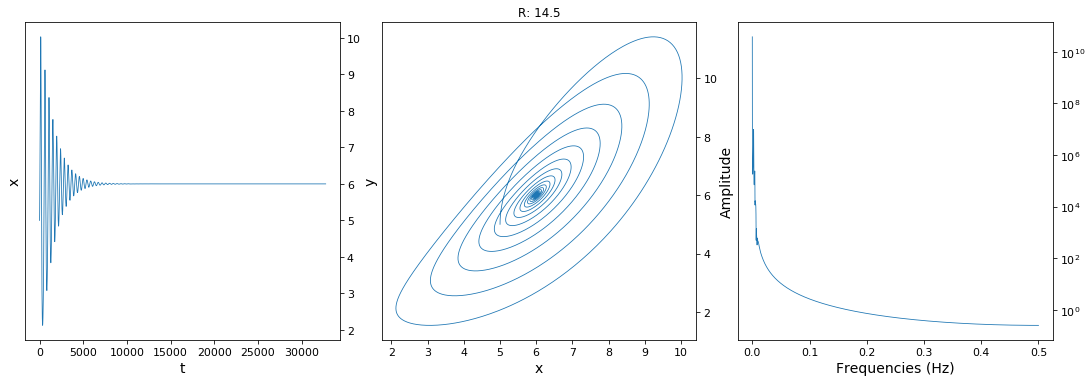

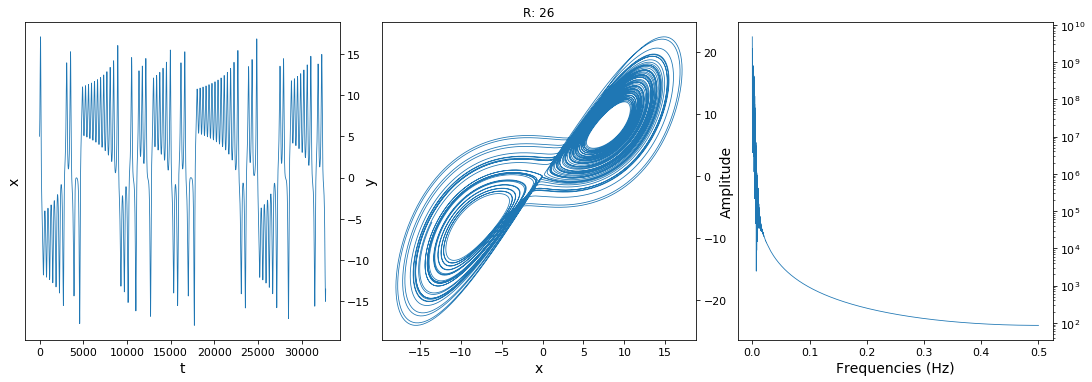

In [75]:
label_size = 11
font_size = 14

for r in [1, 3, 13, 14.5, 26]:
    x, y, z = lorenz_positions(5, 5, 5, r=r, max_time=64, dt=64/2**15)
    
    #*********Plotting*********
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.tight_layout()
    
    ax[0].plot(x, linewidth=0.8)
    ax[1].plot(x, y, linewidth=0.8)
    ax[2].plot((np.fft.rfftfreq(len(x))), np.abs(np.fft.rfft(x))**2, linewidth=0.8)
    
    ax[0].tick_params(labelsize=label_size)
    ax[1].tick_params(labelsize=label_size)
    ax[2].tick_params(labelsize=label_size)
    
    ax[1].set_title('R: ' + str(r))
    
    ax[0].set_xlabel('t', fontsize=font_size)
    ax[0].set_ylabel('x', fontsize=font_size)
    ax[0].yaxis.tick_right()
    
    ax[1].set_xlabel('x', fontsize=font_size)
    ax[1].set_ylabel('y', fontsize=font_size)
    ax[1].yaxis.tick_right()
        
    ax[2].set_xlabel('Frequencies (Hz)', fontsize=font_size)
    ax[2].set_ylabel('Amplitude', fontsize=font_size)
    ax[2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax[2].set_yscale('log')
    ax[2].yaxis.tick_right()

In [122]:
rs = np.linspace(0, 30, 1501)
spectral_densities = []
max_time = 512
time_step = 1/64

for r in rs:
    x, y, z = lorenz_positions(7.8, 7.8, 27, r=r, max_time=max_time, dt=time_step)

    spectral_densities.append(np.abs(np.fft.rfft(x))**2)
    
    if r%3<1e-5: print("r =", r, "done")
    
xx, yy = np.meshgrid(rs, np.fft.rfftfreq(len(x)))
spectral_densities = np.array(spectral_densities)
print("Complete.")

r = 0.0 done
r = 3.0 done
r = 6.0 done
r = 9.0 done
r = 12.0 done
r = 15.0 done
r = 18.0 done
r = 21.0 done
r = 24.0 done
r = 27.0 done
r = 30.0 done
Complete.


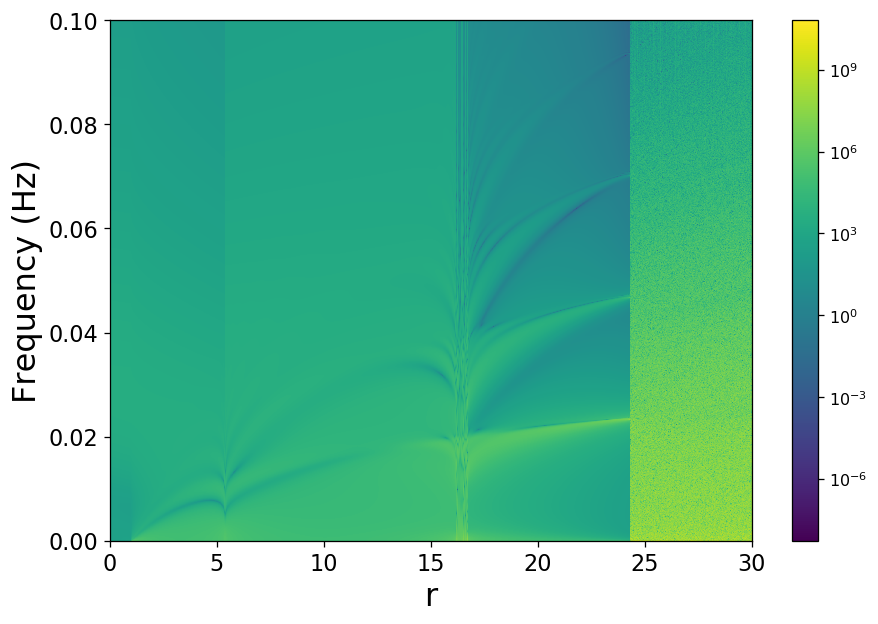

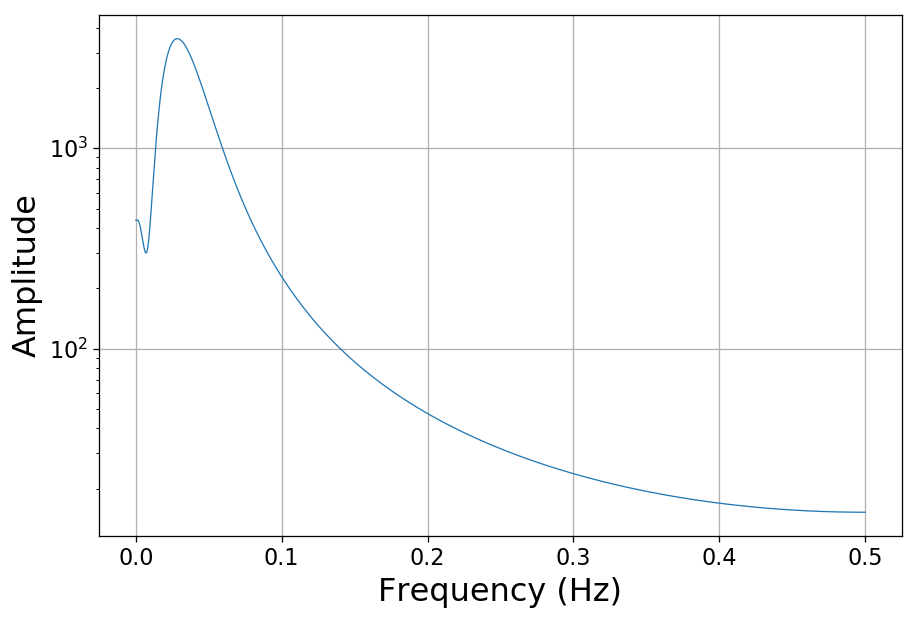

In [137]:
#**********Plotting***********
font_size=20

make_plot(y_label='Frequency (Hz)', x_label='r', grid=False)
plt.pcolormesh(xx, yy, spectral_densities.T, 
               norm=colors.LogNorm(vmin=spectral_densities.min(), vmax=spectral_densities.max()))
plt.set_cmap('viridis')
plt.gca().set_ylim(0, 0.1)
plt.colorbar()
plt.show()

plot = make_plot(x_label="Frequency (Hz)", y_label="Amplitude").plot(np.fft.rfftfreq(int(max_time/time_step)), 
                                                              spectral_densities[10], linewidth=0.8)
plt.gca().ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.gca().set_yscale('log');

# 4.2

In [51]:
def qx(x):
    
    i = 0+1j
    x0=2/3
    sigma = 0.03
    
    return (1/np.sqrt(2*np.pi*sigma*sigma))*np.exp(-(x-x0)**2/(2*sigma*sigma))

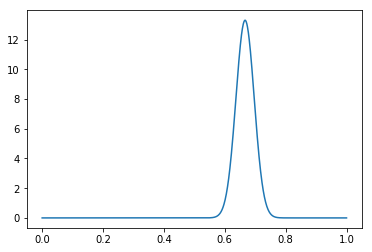

In [52]:
x = np.linspace(0,1,2**10)

q = qx(x)

plt.plot(x, q);

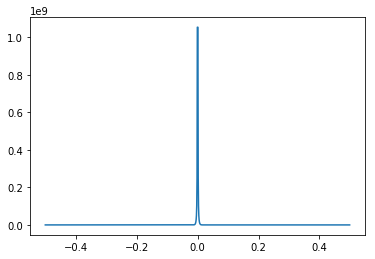

In [53]:
Q = np.fft.fft(q)
freq = np.fft.fftfreq(2**10)
T = np.fft.ifft(Q[1:]/freq[1:])

Qm0 = Q[1:]
fm0 = freq[1:]
order = np.argsort(fm0)
plt.plot(fm0[order], np.abs(Qm0[order]/fm0[order]**2))
plt.show()


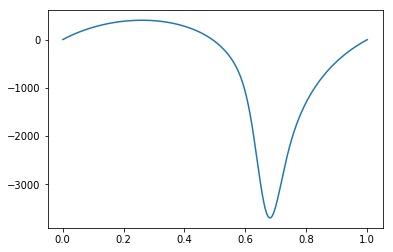

In [54]:
plt.plot(x[1:],T.real);